<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/task10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electricity Load Forecasting

# Data Preprocessing

In [9]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
con_df = pd.read_csv('/content/drive/MyDrive/Datasets/Electricity Load Forecasting/continuous dataset.csv', index_col=[0], parse_dates=[0])

con_df.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
datetime,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [11]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48048 entries, 2015-01-03 01:00:00 to 2020-06-27 00:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nat_demand  48048 non-null  float64
 1   T2M_toc     48048 non-null  float64
 2   QV2M_toc    48048 non-null  float64
 3   TQL_toc     48048 non-null  float64
 4   W2M_toc     48048 non-null  float64
 5   T2M_san     48048 non-null  float64
 6   QV2M_san    48048 non-null  float64
 7   TQL_san     48048 non-null  float64
 8   W2M_san     48048 non-null  float64
 9   T2M_dav     48048 non-null  float64
 10  QV2M_dav    48048 non-null  float64
 11  TQL_dav     48048 non-null  float64
 12  W2M_dav     48048 non-null  float64
 13  Holiday_ID  48048 non-null  int64  
 14  holiday     48048 non-null  int64  
 15  school      48048 non-null  int64  
dtypes: float64(13), int64(3)
memory usage: 6.2 MB


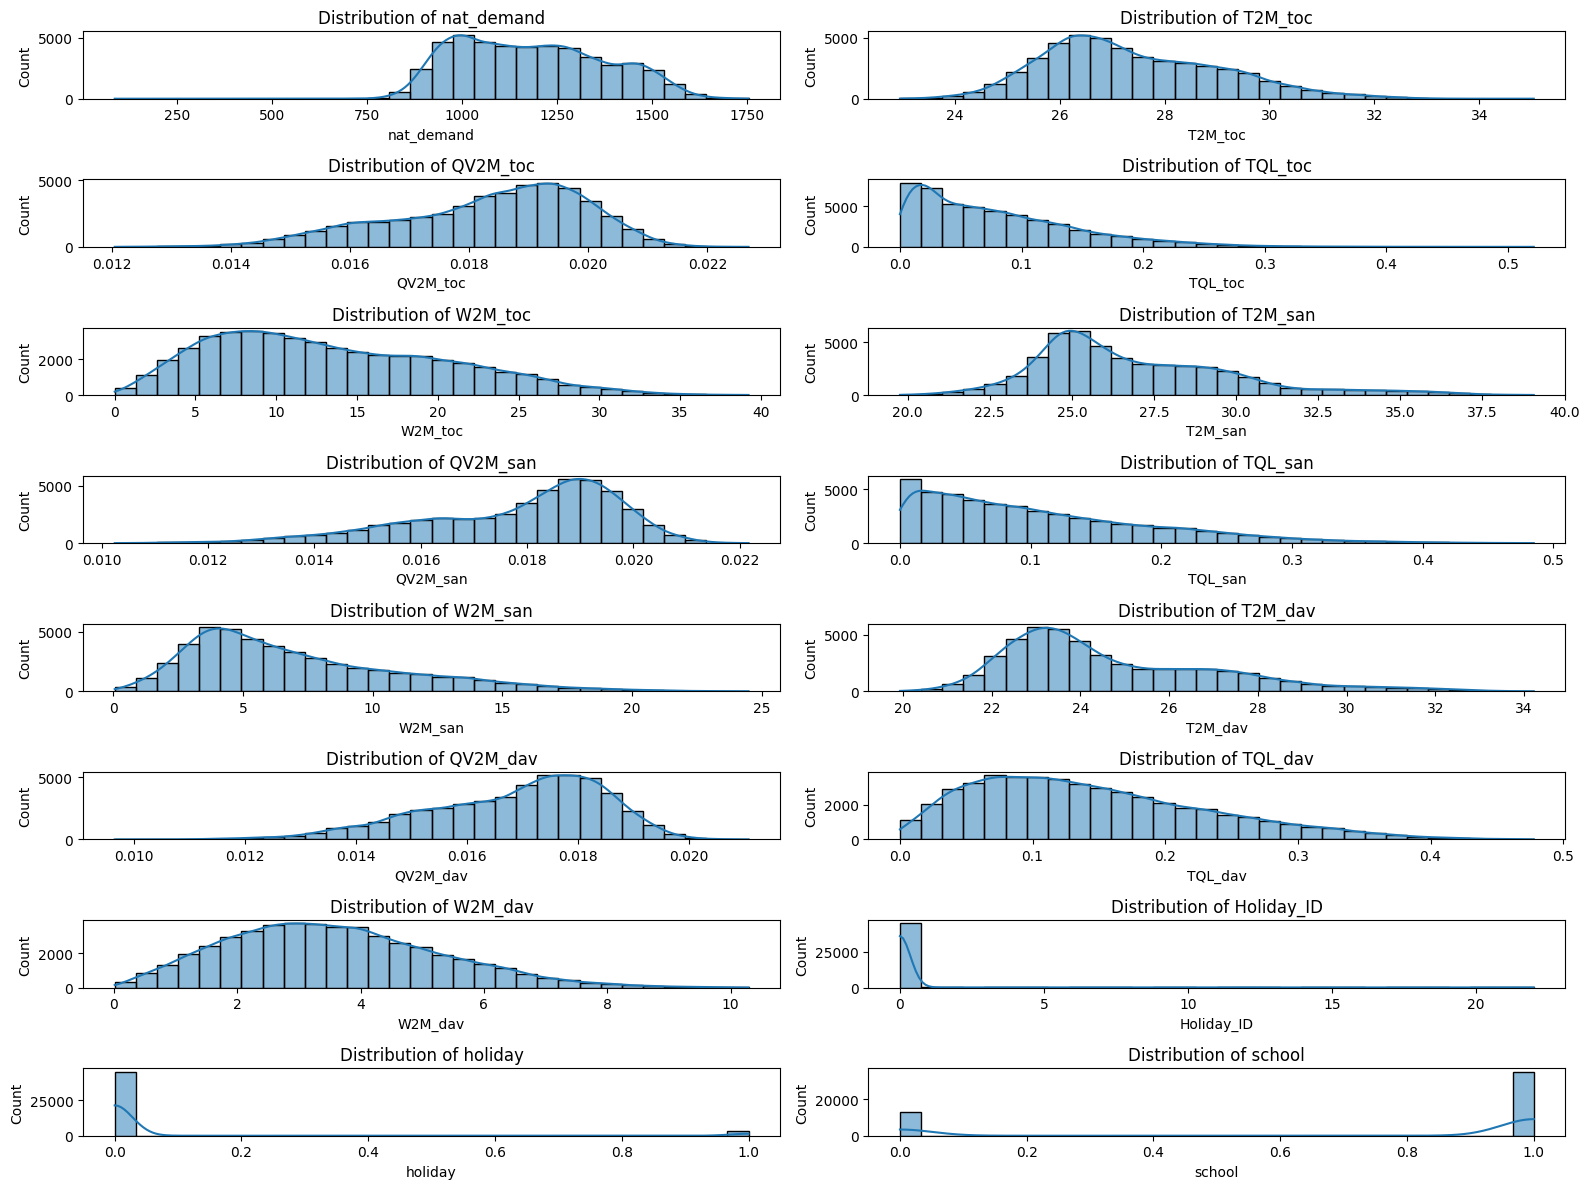

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = [col for col in con_df.columns if con_df[col].dtype in ['int64', 'float64']]

num_rows = (len(numerical_features) + 1) // 2

plt.figure(figsize=(16, 12))

# Plot histograms for numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(num_rows, 2, i)
    sns.histplot(con_df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

In [ ]:
print(con_df.duplicated().value_counts())

# Check for NaN values in the dataset
nan_values = con_df.isna().any().any()

# Drop duplicate rows
con_df = con_df.drop_duplicates()

# Display the number of NaN values per column and the difference in shape after dropping duplicates
nan_values, con_df.shape, con_df.shape, con_df.duplicated().value_counts()

False    48048
Name: count, dtype: int64


(False,
 (48048, 16),
 (48048, 16),
 False    48048
 Name: count, dtype: int64)

In [ ]:
numerical_features

['nat_demand',
 'T2M_toc',
 'QV2M_toc',
 'TQL_toc',
 'W2M_toc',
 'T2M_san',
 'QV2M_san',
 'TQL_san',
 'W2M_san',
 'T2M_dav',
 'QV2M_dav',
 'TQL_dav',
 'W2M_dav',
 'Holiday_ID',
 'holiday',
 'school']

- **nat_demand**: National electricity load

- **T2M_toc**: Temperature at 2 meters in Tocumen, Panama City
- **QV2M_toc**: Relative humidity at 2 meters in Tocumen, Panama City
- **TQL_toc**: Liquid precipitation in Tocumen, Panama City
- **W2M_toc**: Wind speed at 2 meters in Tocumen, Panama City
- **T2M_san**: Temperature at 2 meters in Santiago City
- **QV2M_san**: Relative humidity at 2 meters in Santiago City
- **TQL_san**: Liquid precipitation in Santiago City
- **W2M_san**: Wind speed at 2 meters in Santiago City
- **T2M_dav**: Temperature at 2 meters in David City
- **QV2M_dav**: Relative humidity at 2 meters in David City
- **TQL_dav**: Liquid precipitation in David City
- **W2M_dav**: Wind speed at 2 meters in David City
- **Holiday_ID**: Unique identification number for holidays
- **holiday**: Holiday binary indicator (1 indicating a holiday, 0 indicating a regular day)
- **school**: School period binary indicator (1 indicating school in session, 0 indicating vacations)

In [13]:
# Re-apply the create_features function to add the new features without removing existing columns
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype('category')
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week  # Use isocalendar().week
    df['date_offset'] = (df.date.dt.month * 100 + df.date.dt.day - 320) % 1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall', 'Winter'])
    if label:
        y = df[label]
        return df, y
    return df

# Apply the create_features function to the dataframe con_df without removing existing columns
con_df_featured, y = create_features(con_df, label='nat_demand')

con_df_featured.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,dayofweek,weekday,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,...,5,Saturday,1,1,2015,3,3,1,1083,Winter
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,...,5,Saturday,1,1,2015,3,3,1,1083,Winter
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,...,5,Saturday,1,1,2015,3,3,1,1083,Winter
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,...,5,Saturday,1,1,2015,3,3,1,1083,Winter
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,...,5,Saturday,1,1,2015,3,3,1,1083,Winter


In [14]:
con_df_featured.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48048 entries, 2015-01-03 01:00:00 to 2020-06-27 00:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   nat_demand   48048 non-null  float64       
 1   T2M_toc      48048 non-null  float64       
 2   QV2M_toc     48048 non-null  float64       
 3   TQL_toc      48048 non-null  float64       
 4   W2M_toc      48048 non-null  float64       
 5   T2M_san      48048 non-null  float64       
 6   QV2M_san     48048 non-null  float64       
 7   TQL_san      48048 non-null  float64       
 8   W2M_san      48048 non-null  float64       
 9   T2M_dav      48048 non-null  float64       
 10  QV2M_dav     48048 non-null  float64       
 11  TQL_dav      48048 non-null  float64       
 12  W2M_dav      48048 non-null  float64       
 13  Holiday_ID   48048 non-null  int64         
 14  holiday      48048 non-null  int64         
 15  school       48048

In [15]:
from sklearn.preprocessing import LabelEncoder

# Remove unnecessary columns
columns_to_keep = [
    'nat_demand', 'T2M_toc', 'QV2M_toc', 'TQL_toc', 'W2M_toc',
    'T2M_san', 'QV2M_san', 'TQL_san', 'W2M_san', 'T2M_dav',
    'QV2M_dav', 'TQL_dav', 'W2M_dav', 'Holiday_ID', 'holiday',
    'school', 'hour', 'dayofweek', 'weekday', 'quarter',
    'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear',
    'date_offset', 'season'
]
con_df_featured = con_df_featured[columns_to_keep]

# Label encode the 'season' categorical feature
label_encoder = LabelEncoder()
con_df_featured['season'] = label_encoder.fit_transform(con_df_featured['season'].astype(str))
con_df_featured['weekday'] = label_encoder.fit_transform(con_df_featured['weekday'].astype(str))

con_df_featured.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48048 entries, 2015-01-03 01:00:00 to 2020-06-27 00:00:00
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nat_demand   48048 non-null  float64
 1   T2M_toc      48048 non-null  float64
 2   QV2M_toc     48048 non-null  float64
 3   TQL_toc      48048 non-null  float64
 4   W2M_toc      48048 non-null  float64
 5   T2M_san      48048 non-null  float64
 6   QV2M_san     48048 non-null  float64
 7   TQL_san      48048 non-null  float64
 8   W2M_san      48048 non-null  float64
 9   T2M_dav      48048 non-null  float64
 10  QV2M_dav     48048 non-null  float64
 11  TQL_dav      48048 non-null  float64
 12  W2M_dav      48048 non-null  float64
 13  Holiday_ID   48048 non-null  int64  
 14  holiday      48048 non-null  int64  
 15  school       48048 non-null  int64  
 16  hour         48048 non-null  int32  
 17  dayofweek    48048 non-null  int32  
 18  weekday    

In [16]:
con_df_featured.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,dayofweek,weekday,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,...,5,2,1,1,2015,3,3,1,1083,3


In [18]:
# Resample the data to ensure an hourly frequency
con_df_resampled = con_df_featured.resample('H').sum()

# Set the frequency of the index column to hourly
con_df_resampled.index.freq = 'H'

# Display the first few rows of the resampled dataframe
con_df_resampled.head()

,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,...,dayofweek,weekday,quarter,month,year,dayofyear,dayofmonth,weekofyear,date_offset,season
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,...,5,2,1,1,2015,3,3,1,1083,3
2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,...,5,2,1,1,2015,3,3,1,1083,3


# Modeling

## Augmented Dickey-Fuller Test

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine whether a given time series is stationary or non-stationary.

In [20]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    """
    Perform ADF test on the given time series and print a comprehensive report.
    """
    result = adfuller(series.dropna(), autolag='AIC')
    print(f'Augmented Dickey-Fuller Test: {title}')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = dict(zip(labels, result[:4]))
    for key, val in out.items():
        print(f'{key} : {val}')

    print('Critical Values:')
    for key, val in result[4].items():
        print(f'   {key} : {val}')

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

# Apply the ADF test on the 'nat_demand' column to assess its stationarity
adf_test(con_df_resampled['nat_demand'], title='National Electricity Load (nat_demand)')


Augmented Dickey-Fuller Test: National Electricity Load (nat_demand)
ADF Test Statistic : -20.96175000729656
p-value : 0.0
# Lags Used : 57
# Observations : 47990
Critical Values:
   1% : -3.430486271094305
   5% : -2.861600228969454
   10% : -2.5668020578981667
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Given the extremely low p-value and the ADF test statistic being lower than all critical values, we reject the null hypothesis. This implies that there is strong evidence against the presence of a unit root.

Stationarity is a crucial assumption for many time series models, including ARIMA and its variants. When a series is stationary, it means that the underlying data generation process is stable over time, making it easier to model and predict future values. Non-stationary data, on the other hand, can have trends, seasonality, or other structures that complicate modeling.

Now Let's proceed

**Data Splitting**

In [21]:
# Printing the maximum timestamp in the dataset
print(con_df_resampled.index.max())

# Printing the minimum timestamp in the dataset
print(con_df_resampled.index.min())

2020-06-27 00:00:00
2015-01-03 01:00:00


In [22]:
# Define the range for training and testing datasets based on the given dataset range
train_end_date = '2019-12-31 23:59:00'
test_start_date = '2020-01-01 00:00:00'

# Divide the dataset into training and testing sets
train_data = con_df_resampled[:train_end_date]
test_data = con_df_resampled[test_start_date:]

# Display the range of the training and testing datasets
train_data_range = (train_data.index.min(), train_data.index.max())
test_data_range = (test_data.index.min(), test_data.index.max())

train_data_range, test_data_range

((Timestamp('2015-01-03 01:00:00'), Timestamp('2019-12-31 23:00:00')),
 (Timestamp('2020-01-01 00:00:00'), Timestamp('2020-06-27 00:00:00')))

## Exponential Smoothing

Exponential smoothing is a technique for forecasting time series data that calculates future values by averaging past observations with weights that decrease exponentially.

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit an Exponential Smoothing model on the training data
model = ExponentialSmoothing(
    train_data['nat_demand'],
    trend='add',
    seasonal='add',
    seasonal_periods=24  # Assuming daily seasonality
).fit()

# Make predictions on the test data
test_predictions = model.forecast(len(test_data))

# Display the first few predicted values
print(test_predictions.head())
print(test_predictions.tail())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


2020-01-01 00:00:00    1040.787676
2020-01-01 01:00:00    1009.088521
2020-01-01 02:00:00     983.468853
2020-01-01 03:00:00     961.299712
2020-01-01 04:00:00     949.887343
Freq: H, dtype: float64
2020-06-26 20:00:00    1102.206899
2020-06-26 21:00:00    1060.260049
2020-06-26 22:00:00    1010.096231
2020-06-26 23:00:00     958.703798
2020-06-27 00:00:00     915.231632
Freq: H, dtype: float64


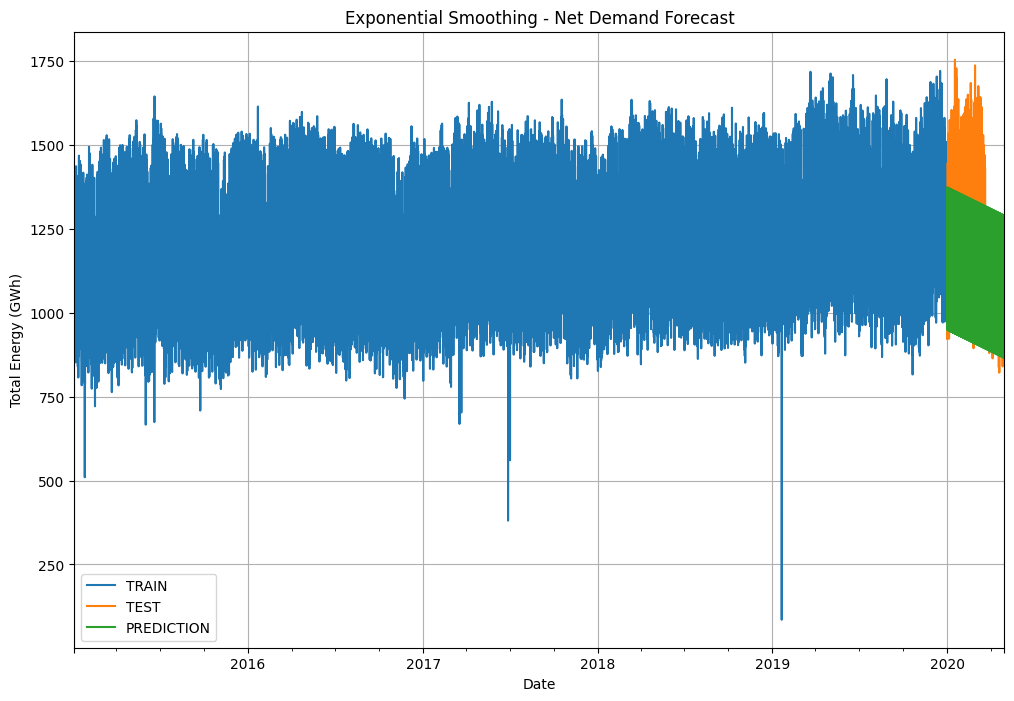

In [24]:
from datetime import timedelta

number_of_days = 120

number_of_hours_to_predict = number_of_days * 24

# Set the development date (start of the test data)
dev_date = test_data.index[0]

# Calculate the end date for the prediction
end_date = dev_date + timedelta(hours=number_of_hours_to_predict - 1)

y_actual = test_data['nat_demand'][dev_date:end_date]

# Use the fitted model to forecast the values for the specified number of hours
test_predictions = model.forecast(number_of_hours_to_predict).rename('HW_Forecast')

import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(12, 8))

# Plotting the actual(nat_demand) from the training data
train_data['nat_demand'].plot(legend=True, label='TRAIN')

# Plotting the actual (nat_demand) from the test data
y_actual.plot(legend=True, label='TEST')

# Plotting the predicted(nat_demand) values
test_predictions.plot(legend=True, label='PREDICTION')

plt.title('Exponential Smoothing - Net Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Total Energy (GWh)')
plt.grid(True)
plt.show()

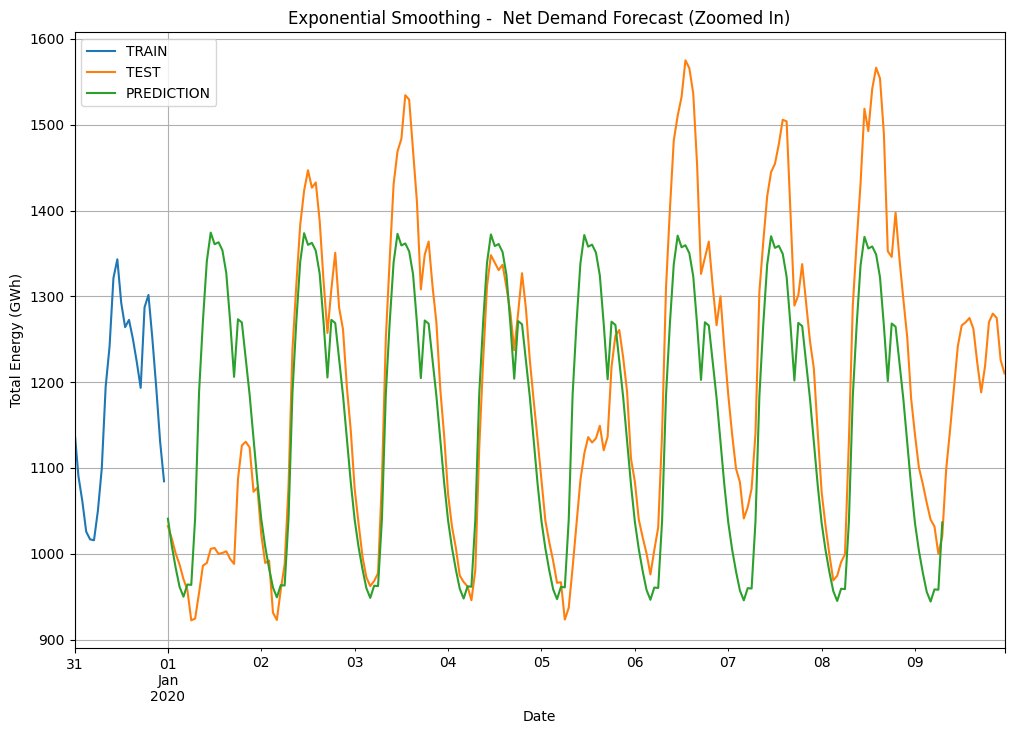

In [25]:
# Zoom in on the plot to get a clearer comparison

train_data['nat_demand']['2019-12-31':].plot(legend=True, label='TRAIN')

test_data['nat_demand'][:'2020-01-9'].plot(legend=True, label='TEST', figsize=(12, 8))

# Plotting the first 200 points of the predictions
test_predictions[:200].plot(legend=True, label='PREDICTION')

plt.title('Exponential Smoothing -  Net Demand Forecast (Zoomed In)')
plt.xlabel('Date')
plt.ylabel('Total Energy (GWh)')
plt.grid(True)
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_actual, test_predictions[:len(y_actual)])

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_actual, test_predictions[:len(y_actual)], squared=False)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = (abs((y_actual - test_predictions[:len(y_actual)]) / y_actual)).mean() * 100

rmse, mae, mape


(161.45642270152993, 138.29995210329608, 11.247854902640661)

MAPE represents prediction error as a percentage of the actual values, giving a normalized gauge of accuracy. For instance, a MAPE of 11.2% indicates that, on average, predictions deviate by 11.2% from the actual values. Meanwhile, a Mean Absolute Error of 138.299 is fairly average, especially when the actual values are around 1000.

## Autoregression (AR) Model

The Autoregressive (AR) model, combined with the Moving-Average (MA) model, forms a special case and a fundamental part of the broader Autoregressive-Moving-Average (ARMA) and Autoregressive Integrated Moving-Average (ARIMA) models used in time series analysis.

The AR model represents a type of random process and can describe various time-varying phenomena in fields like nature, economics, and behavior. It defines the output variable as a linear function of its past values plus a stochastic term, which accounts for random deviations. This model is expressed as a stochastic difference equation, not to be confused with a differential equation.


In [27]:
from statsmodels.tsa.ar_model import AutoReg, ARResults
import warnings

# Ignore harmless warnings
warnings.filterwarnings("ignore")

# Fit the AutoRegressive model with a specified number of lags
model = AutoReg(train_data['nat_demand'], lags=1)

# Fit the model
ARfit = model.fit()
print(ARfit.params)

# Define the start and end points for predictions
start = len(train_data['nat_demand'])
end = len(train_data['nat_demand']) + len(test_data['nat_demand']) - 1

# Generate predictions
predictions1 = ARfit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

# Display the first few predictions
print(predictions1.head())
print(predictions1.tail())

const            58.549607
nat_demand.L1     0.950556
dtype: float64
2020-01-01 00:00:00    1089.402463
2020-01-01 01:00:00    1094.087527
2020-01-01 02:00:00    1098.540943
2020-01-01 03:00:00    1102.774163
2020-01-01 04:00:00    1106.798075
Freq: H, Name: AR(1) Predictions, dtype: float64
2020-06-26 20:00:00    1184.157202
2020-06-26 21:00:00    1184.157202
2020-06-26 22:00:00    1184.157202
2020-06-26 23:00:00    1184.157202
2020-06-27 00:00:00    1184.157202
Freq: H, Name: AR(1) Predictions, dtype: float64


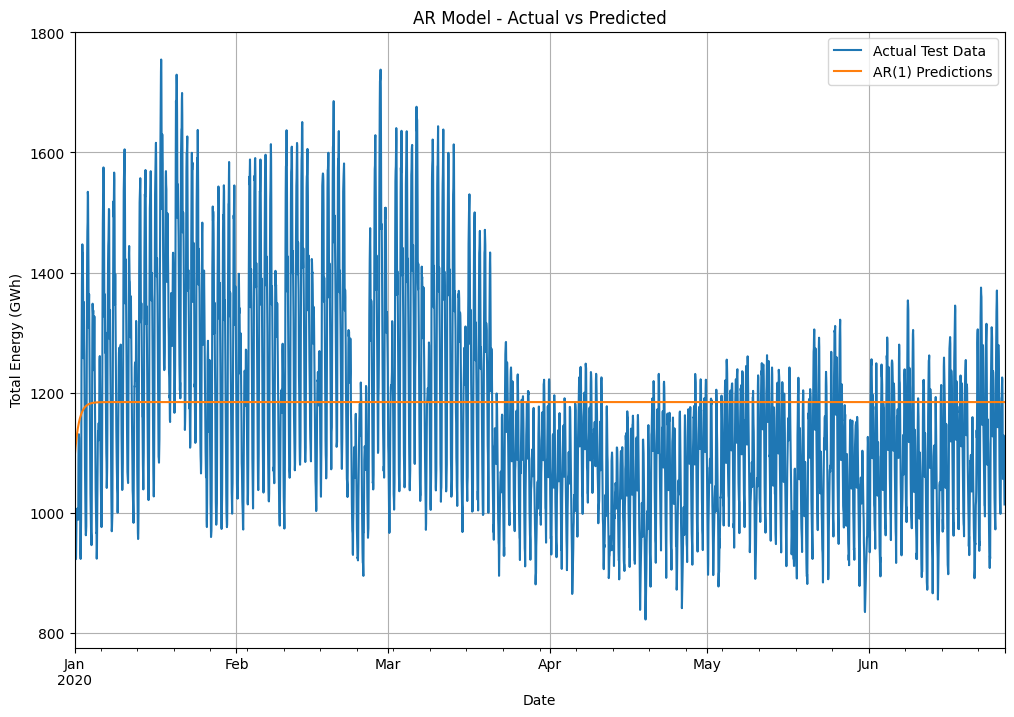

In [29]:
import matplotlib.pyplot as plt

# Plotting the actual test data
test_data['nat_demand'].plot(figsize=(12, 8), legend=True, label='Actual Test Data')

# Plotting the predictions from the AR model
predictions1.plot(figsize=(12, 8), legend=True, label='AR(1) Predictions')

plt.title('AR Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Total Energy (GWh)')
plt.grid(True)
plt.show()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

actual_values = test_data['nat_demand'][predictions1.index]

rmse = mean_squared_error(actual_values, predictions1, squared=False)

mape = (np.abs((actual_values - predictions1) / actual_values).mean()) * 100

print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")


RMSE: 176.3798793161863
MAPE: 12.137451815516092


Even if the RMSE is relatively low, the model's output appears to stabilize into a flat horizontal line. This suggests that the model struggles to capture the variations in electricity demand effectively.

## Seasonal Autoregressive Integrated Moving Average (SARIMA) Model


SARIMA is an extension of the non-seasonal ARIMA model, tailored to handle data with seasonal variations. It addresses both short-term and long-term dependencies in the data, making it a powerful forecasting tool. SARIMA integrates autoregressive (AR), integrated (I), and moving average (MA) models with seasonal elements.

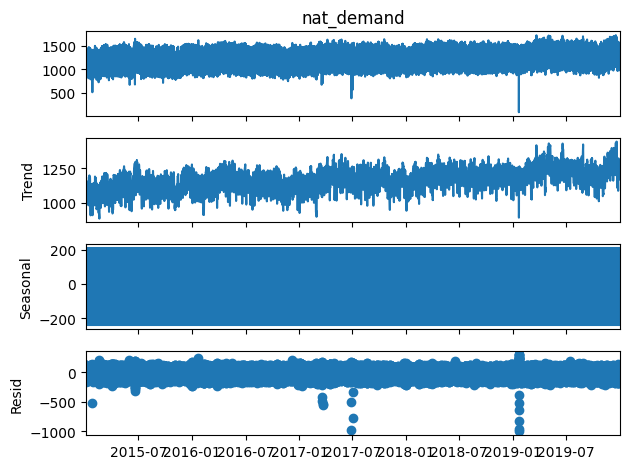

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_data['nat_demand'], model='additive')  # model='add' also works
result.plot();

Residuals indicate the variability left in the data after accounting for trend and seasonal components. They reflect the noise or irregular fluctuations in the data, and there are some noticeable outliers present.

The trend component exhibits a generally stable pattern, with occasional periods of increase and decrease.

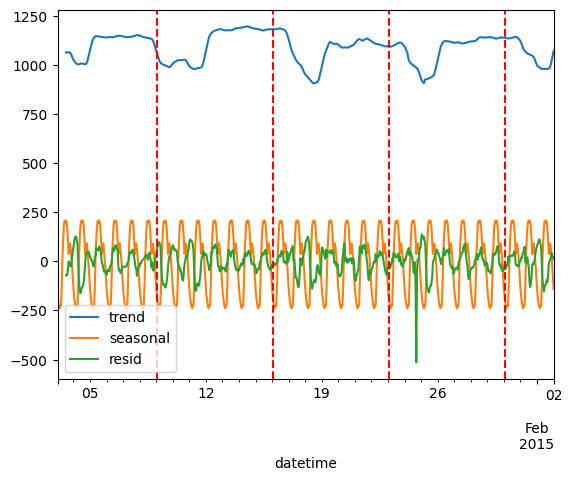

In [34]:
n_days = 30
n = 24 * n_days
# To plot the first n points of the trend component
result.trend[:n].plot(legend=True);

# To plot the first n points of the seasonal component
result.seasonal[:n].plot(legend=True);

# To plot the first n points of the residual component
result.resid[:n].plot(legend=True);

# Adding vertical lines at the start of each week
min_date, max_date = train_data.index.min(), train_data.index.max()
current_date = min_date

while current_date <= max_date:
    if current_date.weekday() == 4:  # Monday is considered the start of the week
        plt.axvline(x=current_date, color='red', linestyle='--')
    current_date += pd.Timedelta(days=1)

<Axes: xlabel='datetime'>

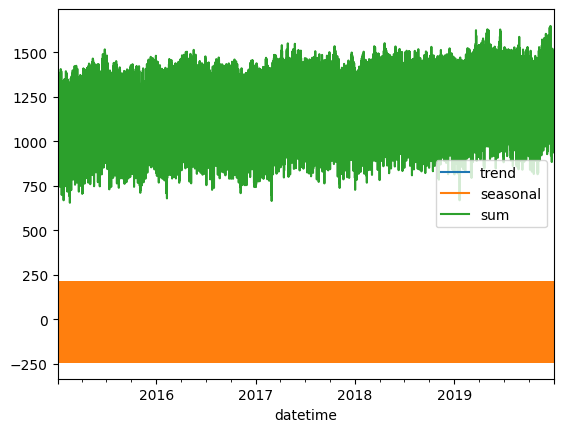

In [35]:
decomp_data = {}
decomp_data['trend'] = result.trend
decomp_data['seasonal'] = result.seasonal
df_decom_data = pd.DataFrame(decomp_data)
df_decom_data['sum'] = df_decom_data['trend'] + df_decom_data['seasonal']
df_decom_data.plot()

In [36]:
df_decom_data.head()

,trend,seasonal,sum
datetime,,,
2015-01-03 01:00:00,NaN,-178.980325,NaN
2015-01-03 02:00:00,NaN,-208.454769,NaN
2015-01-03 03:00:00,NaN,-229.539252,NaN
2015-01-03 04:00:00,NaN,-238.988411,NaN
2015-01-03 05:00:00,NaN,-224.848620,NaN


In [37]:
from datetime import datetime
import pandas as pd

train_start = pd.Timestamp('2015-01-03 01:00:00')
train_end = pd.Timestamp('2019-12-31 23:00:00')
test_start = pd.Timestamp('2020-01-01 00:00:00')
test_end = pd.Timestamp('2020-06-27 00:00:00')

dev_date_str = '2020-01-01 00:00:00'

dev_date = pd.Timestamp(dev_date_str)

df_decom_data_train = df_decom_data[:dev_date]


# Display the first few rows to confirm the splits
print("df_decom_data_train:")
print(df_decom_data_train.head())


df_decom_data_train:
                     trend    seasonal  sum
datetime                                   
2015-01-03 01:00:00    NaN -178.980325  NaN
2015-01-03 02:00:00    NaN -208.454769  NaN
2015-01-03 03:00:00    NaN -229.539252  NaN
2015-01-03 04:00:00    NaN -238.988411  NaN
2015-01-03 05:00:00    NaN -224.848620  NaN


datetime
2015-01-03 01:00:00     970.3450
2015-01-03 02:00:00     912.1755
2015-01-03 03:00:00     900.2688
2015-01-03 04:00:00     889.9538
2015-01-03 05:00:00     893.6865
                         ...    
2015-02-13 12:00:00    1394.7901
2015-02-13 13:00:00    1402.9209
2015-02-13 14:00:00    1366.2013
2015-02-13 15:00:00    1293.1245
2015-02-13 16:00:00    1223.5003
Freq: H, Name: nat_demand, Length: 1000, dtype: float64


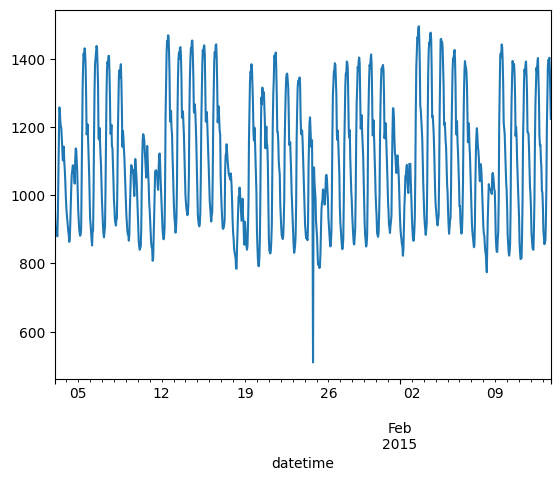

In [38]:
train_data['nat_demand'][:1000].plot()
print(train_data['nat_demand'][:1000])

                           trend    seasonal          sum
datetime                                                 
2015-01-03 01:00:00          NaN -178.980325          NaN
2015-01-03 02:00:00          NaN -208.454769          NaN
2015-01-03 03:00:00          NaN -229.539252          NaN
2015-01-03 04:00:00          NaN -238.988411          NaN
2015-01-03 05:00:00          NaN -224.848620          NaN
...                          ...         ...          ...
2015-02-13 12:00:00  1120.713313  198.058091  1318.771403
2015-02-13 13:00:00  1121.633773  208.872026  1330.505799
2015-02-13 14:00:00  1122.229717  203.079778  1325.309495
2015-02-13 15:00:00  1122.756352  172.132034  1294.888386
2015-02-13 16:00:00  1123.367017  112.738371  1236.105388

[1000 rows x 3 columns]


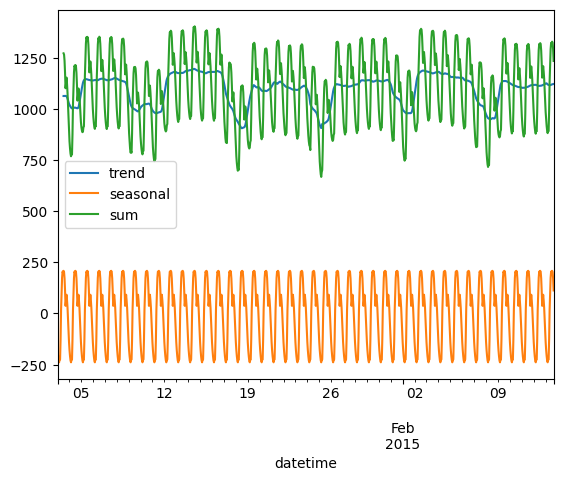

In [39]:
df_decom_data_train[:1000].plot()
print(df_decom_data_train[:1000])

In [40]:
from statsmodels.tsa.seasonal import STL

stl = STL(train_data['nat_demand'])
result = stl.fit()

df_decomposed = pd.DataFrame({
    'trend': result.trend,
    'seasonal': result.seasonal,
    'residual': result.resid
})

# Check the first few rows
print(df_decomposed.head())


                           trend    seasonal   residual
datetime                                               
2015-01-03 01:00:00  1055.746076 -139.421478  54.020402
2015-01-03 02:00:00  1055.392780 -172.316444  29.099164
2015-01-03 03:00:00  1055.024245 -189.941366  35.185921
2015-01-03 04:00:00  1054.638866 -202.558784  37.873718
2015-01-03 05:00:00  1054.234287 -195.803105  35.255318


In [41]:
df_decom_data_train['sum'] = df_decom_data_train['trend'] + df_decom_data_train['seasonal']

In [42]:
# Filling NaN values with interpolation
df_decomposed['trend'].interpolate(method='linear', inplace=True)
df_decomposed['sum'] = df_decomposed['trend'] + df_decomposed['seasonal']

# Dropping rows with NaN values
df_decomposed.dropna(inplace=True)
df_decomposed.isna().any().any()

False

In [43]:
train_data.isna().any().any()

False

In [44]:
df_decomposed = df_decomposed.drop("residual", axis=1)
df_decomposed

,trend,seasonal,sum
datetime,,,
2015-01-03 01:00:00,1055.746076,-139.421478,916.324598
2015-01-03 02:00:00,1055.392780,-172.316444,883.076336
2015-01-03 03:00:00,1055.024245,-189.941366,865.082879
2015-01-03 04:00:00,1054.638866,-202.558784,852.080082
2015-01-03 05:00:00,1054.234287,-195.803105,858.431182
...,...,...,...
2019-12-31 19:00:00,1201.010860,129.388212,1330.399073
2019-12-31 20:00:00,1200.180069,95.916665,1296.096734
2019-12-31 21:00:00,1199.375429,57.243985,1256.619413


<Axes: xlabel='datetime'>

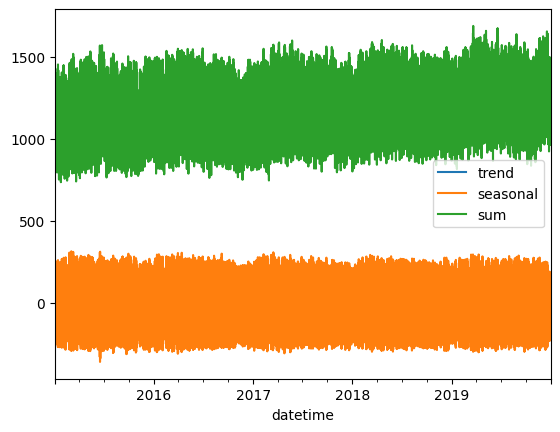

In [45]:
df_decomposed.plot()

<Axes: xlabel='datetime'>

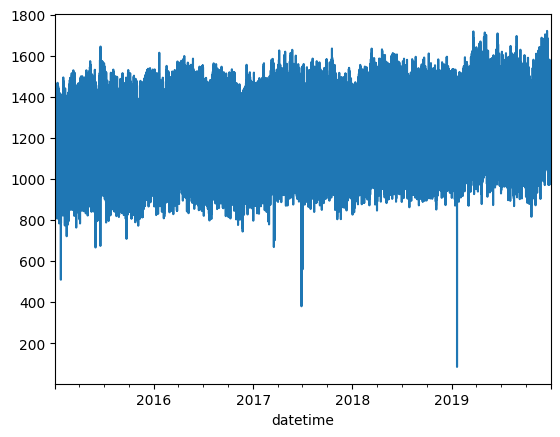

In [46]:
train_data["nat_demand"].plot()

**Fitting the Model**

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(train_data['nat_demand'],
                exog=df_decomposed,
                order=(1, 0, 1),
                seasonal_order=(1, 0, 1, 24),
                enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         nat_demand   No. Observations:                43775
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood             -178468.623
Date:                            Tue, 06 Aug 2024   AIC                         356953.247
Time:                                    15:03:05   BIC                         357022.741
Sample:                                01-03-2015   HQIC                        356975.151
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend          0.3333    2.7e-06   1.24e+05      0.000       0.333       0.333
seasonal       0.3333    3.8e-06   8.78e+04      0.000       0.333       0.333
sum            0.6667   2.27e-06   2.94e+05      0.000       0.667       0.667
ar.L1          0.8485      0.004    230.053      0.000       0.841       0.856
ma.L1          0.3965      0.004    105.302      0.000       0.389       0.404
ar.S.L24      -0.3589      0.002   -191.163      0.000      -0.363      -0.355
ma.S.L24      -0.9983      0.002   -512.007      0.000      -1.002      -0.994
sigma2       334.4789      0.996    335.850      0.000     332.527     336.431
===================================================================================
Ljung-Box (L1) (Q):                 357.41   Jarque-Bera (JB):           7660141.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                        67.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.74e+21. Standard errors may be unstable.
"""

In [49]:
start_hour = train_data.index.max()
n_hours_to_predict = test_data.shape[0]

end_hour = start_hour + pd.Timedelta(hours=n_hours_to_predict)

delt = end_hour - start_hour

# to find the exog_forecast data we go back n years in data and pick the history
n_years_back = 3
start_hour_exo_test = start_hour - pd.DateOffset(years=n_years_back)
exog_forecast = df_decom_data_train[start_hour_exo_test: start_hour_exo_test + delt][:-1]

predictions = results.predict(start=start_hour,
                              end=end_hour,
                              exog=exog_forecast).rename('SARIMAX(1, 0, 1)(1, 0, 1, 24) Predictions')

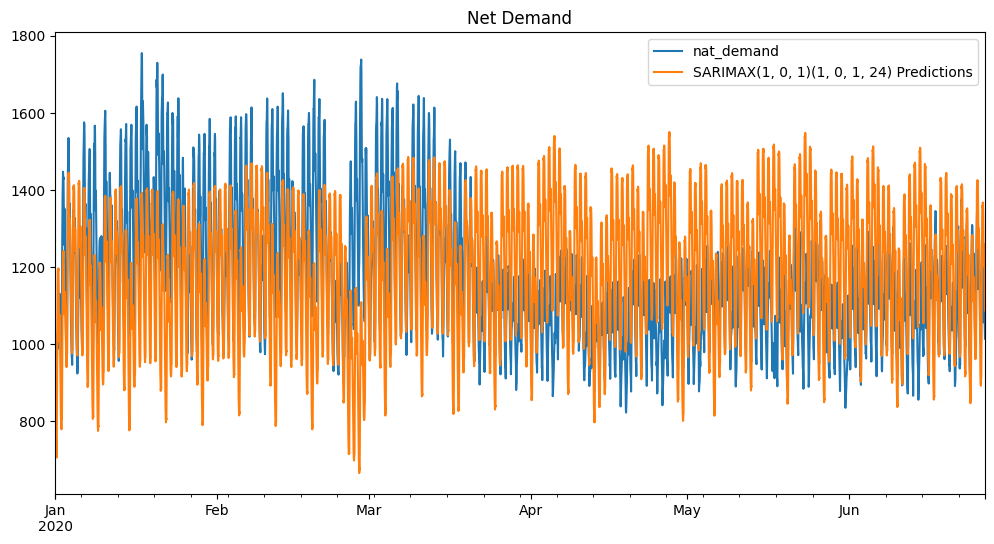

In [50]:
title = 'Net Demand'
ylabel=''
xlabel=''

ax = test_data['nat_demand'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

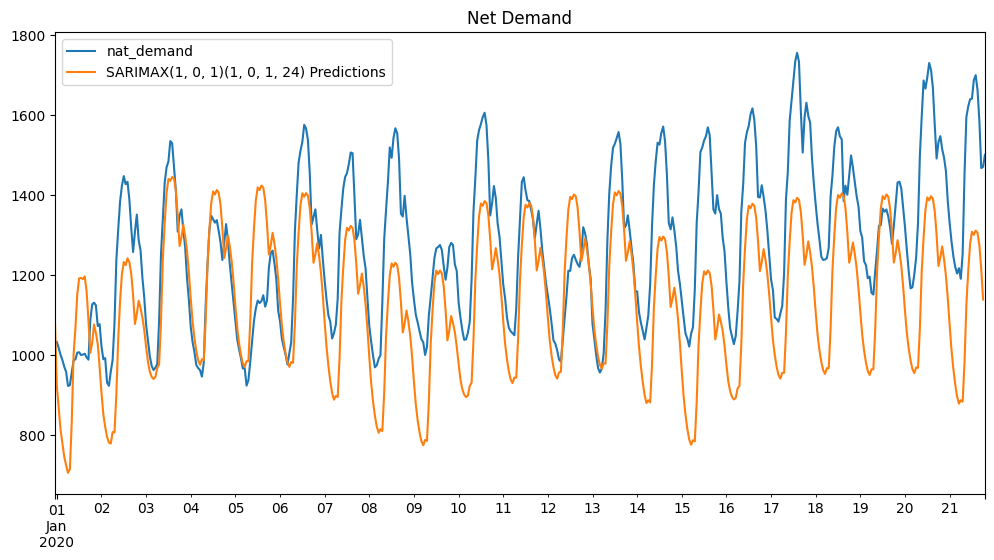

In [51]:
ax = test_data['nat_demand'][:500].plot(legend=True,figsize=(12,6),title=title)

predictions[:500].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [52]:
mae = mean_absolute_error(test_data['nat_demand'], predictions[:-1])
mse = mean_squared_error(test_data['nat_demand'], predictions[:-1])
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Root Mean Squared Error: 201.82908629328426
Mean Absolute Error: 158.3768040954383
Mean Squared Error: 40734.98007398199


**Comparison of Models**

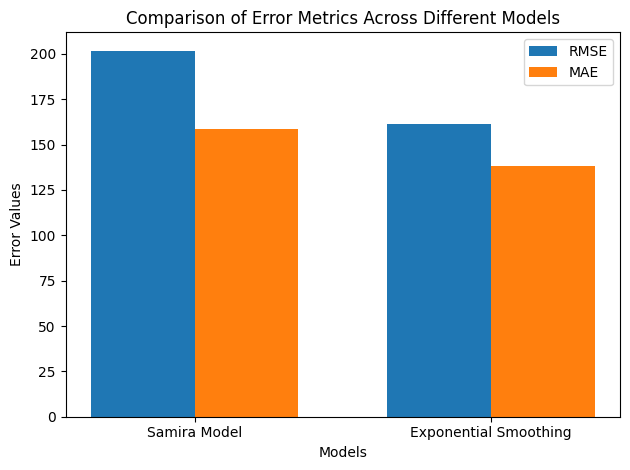

In [53]:
import matplotlib.pyplot as plt

# Data for the models
models = ['Samira Model', 'Exponential Smoothing']
rmse = [201.83, 161.45]
mae = [158.38, 138.29]

# Create a comparison bar chart for RMSE and MAE
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(models))

bar1 = plt.bar(index, rmse, bar_width, label='RMSE')
bar2 = plt.bar([i + bar_width for i in index], mae, bar_width, label='MAE')

plt.xlabel('Models')
plt.ylabel('Error Values')
plt.title('Comparison of Error Metrics Across Different Models')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

plt.tight_layout()
plt.show()


Here’s a bar chart comparing the RMSE and MAE for the Samira model and Exponential Smoothing. Based on the evaluations and visualizations, Exponential Smoothing seems to perform better for electricity demand.